In [10]:
import rpSBML
import rpGraph
import rpDraw
import matplotlib.pyplot as plt
import networkx as nx
import logging
from rdkit.Chem import MolFromInchi
from rdkit.Chem import Draw
import copy
import json
import re
import drawSvg as draw
import svgutils.transform as sg

In [2]:
logging.basicConfig()
logging.root.setLevel(logging.NOTSET)
logging.basicConfig(level=logging.NOTSET)

logging.basicConfig(
    level=logging.DEBUG,
    #level=logging.WARNING,
    #level=logging.ERROR,
    format='%(asctime)s.%(msecs)03d %(levelname)s %(module)s - %(funcName)s: %(message)s',
    datefmt='%d-%m-%Y %H:%M:%S',
)

In [3]:
#root_path = '/home/mdulac/Downloads/'
root_path = '/Users/melchior/Downloads/'

#rpsbml = rpSBML.rpSBML('test', path='rp_1_3.sbml.xml')
#BUG BUG in the ordering of reactions
#rpsbml = rpSBML.rpSBML('test', path=root_path+'Galaxy1442-[FBA]/rp_3_8.sbml.xml')
#rpsbml = rpSBML.rpSBML('test', path=root_path+'Galaxy1442-[FBA]/rp_18_1.sbml.xml')
#rpsbml = rpSBML.rpSBML('test', path=root_path+'Galaxy1442-[FBA]/rp_16_1.sbml.xml')

#rpsbml = rpSBML.rpSBML('test', path=root_path+'Galaxy225-[Ranked_Pathways]/rp_1_3.sbml.xml')

#rpsbml = rpSBML.rpSBML('test', path=root_path+'rpglobalscore_101/rp_5_4.sbml.xml')
rpsbml = rpSBML.rpSBML('test', path='/home/mdulac/Downloads/rpglobalscore_104/rp_5_1.sbml.xml')

rpgraph = rpGraph.rpGraph(rpsbml)
rpdraw = rpDraw.rpDraw()
target = [i for i in list(rpgraph.G.nodes) if 'TARGET' in i][0]

DEBUG:rpSBML:Started instance of rpSBML
DEBUG:rpGraph:Started instance of rpGraph


In [3]:
pathway = [{'reactants_inchi': ['InChI=1S/C10H13N5O3/c11-9-8-10(13-3-12-9)15(4-14-8)7-1-5(17)6(2-16)18-7/h3-7,16-17H,1-2H2,(H2,11,12,13)/t5-,6+,7+/m0/s1'],
            'products_inchi': ['InChI=1S/C6H6O2/c7-5-3-1-2-4-6(5)8/h1-4,7-8H', 'InChI=1S/C6H6O4/c7-5(8)3-1-2-4-6(9)10/h1-4H,(H,7,8)(H,9,10)/b3-1+,4-2+', 'InChI=1S/C3H6O/c1-3(2)4/h1-2H3'],
            'cofactor_reactants': ['NADP', 'ATP'], 
            'cofactor_products': ['ADP']
           },
      
           {'reactants_inchi': ['InChI=1S/C6H6O2/c7-5-3-1-2-4-6(5)8/h1-4,7-8H', 'InChI=1S/C3H6O/c1-3(2)4/h1-2H3'],
            'products_inchi': ['InChI=1S/C3H6O/c1-3(2)4/h1-2H3'],
            'cofactor_reactants': [], 
            'cofactor_products': []
           },
        
           {'reactants_inchi': ['InChI=1S/C3H6O/c1-3(2)4/h1-2H3', 'InChI=1S/C3H5O.Zn/c1-3(2)4;/h1H2,2H3;/q-1;'],
            'products_inchi': ['InChI=1S/C3H6O/c1-3(2)4/h1-2H3/i1+1,2+1', 'InChI=1S/C3H5O.Zn/c1-3(2)4;/h1H2,2H3;/q-1;'],
            'cofactor_reactants': [], 
            'cofactor_products': []
           }
           
          ]

In [9]:
newG, pos = rpdraw._hierarchy_pos(rpgraph.G, target, plot_only_central=True, filter_cofactors=True)

In [7]:
pos

{'TARGET_0000000001__64__MNXC3': (0.5, 0),
 'RP1': (0.5, -0.2),
 'CMPD_0000000001__64__MNXC3': (0.16666666666666666, -0.4),
 'RP3': (0.5, -0.6000000000000001),
 'CMPD_0000000010__64__MNXC3': (0.5, -0.8),
 'RP4': (0.5, -1.0),
 'MNXM89557__64__MNXC3': (0.5, -1.2),
 'CMPD_0000000003__64__MNXC3': (0.5, -0.4),
 'RP2': (0.5, -0.6000000000000001),
 'MNXM23__64__MNXC3': (0.8333333333333333, -0.4)}

In [26]:
pathway = []
inchi_pathway = []
ordered_y = sorted(list(set([pos[i][1] for i in pos])))
for layer_y_loc in ordered_y:
    ordered_x = sorted(list(set([pos[i][0] for i in pos if pos[i][1]==layer_y_loc])))
    reaction = []
    inchi = []
    for layer_x_loc in ordered_x:
        for node_id in pos:
            if pos[node_id][1]==layer_y_loc and pos[node_id][0]==layer_x_loc:
                n = newG.nodes.get(node_id)
                try:
                    inchi.append(newG.nodes.get(node_id)['brsynth']['inchi'])
                except KeyError:
                    pass
                reaction.append(node_id)
                break
    if all([newG.nodes.get(i)['type']=='reaction' for i in reaction]):
        continue
    pathway.append(reaction)
    inchi_pathway.append(inchi)

In [27]:
pathway

[['MNXM89557__64__MNXC3'],
 ['CMPD_0000000010__64__MNXC3'],
 ['CMPD_0000000001__64__MNXC3',
  'CMPD_0000000003__64__MNXC3',
  'MNXM23__64__MNXC3'],
 ['TARGET_0000000001__64__MNXC3']]

In [28]:
inchi_pathway

[['InChI=1S/C5H9NO4/c6-3(5(9)10)1-2-4(7)8/h3H,1-2,6H2,(H,7,8)(H,9,10)/p-1/t3-/m0/s1'],
 ['InChI=1S/C4H9NO2/c5-3-1-2-4(6)7/h1-3,5H2,(H,6,7)'],
 ['InChI=1S/C4H9NO/c5-3-1-2-4-6/h4H,1-3,5H2',
  'InChI=1S/C3H7NO2/c1-2(4)3(5)6/h2H,4H2,1H3,(H,5,6)',
  'InChI=1S/C3H4O3/c1-2(4)3(5)6/h1H3,(H,5,6)/p-1'],
 ['InChI=1S/C4H12N2/c5-3-1-2-4-6/h1-6H2']]

DEBUG:rpDraw:####################### TARGET_0000000001__64__c #######################
DEBUG:rpDraw:parsed:		[]
DEBUG:rpDraw:saw_first:	[]
DEBUG:rpDraw:x --> 0.5
DEBUG:rpDraw:y --> 0
DEBUG:rpDraw:neighbors:		['RP1']
DEBUG:rpDraw:layer_neighbors:	['RP1']
DEBUG:rpDraw:parent_neighbors:	[]
DEBUG:rpDraw:dx: 1.0
DEBUG:rpDraw:{'type': 'species', 'name': 'TARGET_0000000001', 'miriam': {}, 'brsynth': {'dfG_prime_m': {}, 'dfG_uncert': {}, 'dfG_prime_o': {}, 'smiles': '[H]N([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])N([H])[H]', 'inchi': 'InChI=1S/C4H12N2/c5-3-1-2-4-6/h1-6H2', 'inchikey': 'KIDHWZJUCRJVML-UHFFFAOYSA-N'}, 'central_species': True}
DEBUG:rpDraw:xcenter: 0.5
DEBUG:rpDraw:width: 1.0
DEBUG:rpDraw:nextx: -0.5
DEBUG:rpDraw:	neighbor -> RP1
DEBUG:rpDraw:	width: 1.0
DEBUG:rpDraw:	vert_gap: 0.2
DEBUG:rpDraw:	xcenter: 0.5
DEBUG:rpDraw:	vert_loc: -0.2
DEBUG:rpDraw:==============================================
DEBUG:rpDraw:####################### RP1 #######################
DEBUG:rpDraw:pa

DEBUG:rpDraw:	MNXM1__64__c is not a central species
DEBUG:rpDraw:	MNXM13__64__c is not a central species
DEBUG:rpDraw:neighbors:		['CMPD_0000000009__64__c', 'CMPD_0000000003__64__c']
DEBUG:rpDraw:layer_neighbors:	['CMPD_0000000009__64__c']
DEBUG:rpDraw:parent_neighbors:	['RP2']
DEBUG:rpDraw:dx: 1.0
DEBUG:rpDraw:{'type': 'reaction', 'miriam': {'ec-code': ['4.1.1.12']}, 'brsynth': {'dfG_prime_m': {}, 'dfG_uncert': {}, 'dfG_prime_o': {}, 'path_id': {'value': 18}, 'step_id': {'value': 2}, 'sub_step_id': {'value': 1}, 'rule_score': {'value': 1.0}, 'smiles': '[H]OC(=O)C([H])(N([H])[H])C([H])([H])[H].O=C=O>>[H]OC(=O)C([H])([H])C([H])(C(=O)O[H])N([H])[H].[H+]', 'rule_id': 'RR-02-ad84bdcdbd3e9135-16-F', 'rule_ori_reac': '<brsynth:mnxr value="MNXR96078"/>'}}
DEBUG:rpDraw:xcenter: 1.0
DEBUG:rpDraw:width: 1.0
DEBUG:rpDraw:nextx: 0.0
DEBUG:rpDraw:	neighbor -> CMPD_0000000009__64__c
DEBUG:rpDraw:	width: 1.0
DEBUG:rpDraw:	vert_gap: 0.2
DEBUG:rpDraw:	xcenter: 0.5
DEBUG:rpDraw:	vert_loc: -0.8
DEBUG:rpD

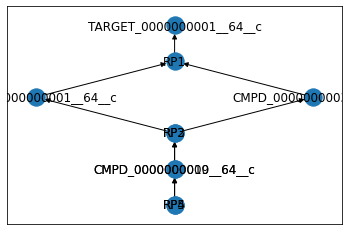

In [22]:
newG, pos = rpdraw._hierarchy_pos(rpgraph.G, target, plot_only_central=True, filter_cofactors=True)
nx.draw_networkx(newG, pos=pos)

DEBUG:rpDraw:	TARGET_0000000001__64__c --> ['RP1']
DEBUG:rpDraw:	RP1 predecessors: ['CMPD_0000000001__64__c', 'CMPD_0000000003__64__c']
DEBUG:rpDraw:parent_layer: ['TARGET_0000000001__64__c', 'MNXM23__64__c']
DEBUG:rpDraw:==================================
DEBUG:rpDraw:toadd_nodes: ['MNXM13__64__c', 'MNXM1__64__c', 'CMPD_0000000010__64__c', 'RP5', 'RP4', 'MNXM5__64__c', 'RP3', 'CMPD_0000000003__64__c', 'MNXM2__64__c', 'MNXM6__64__c', 'MNXM15__64__c', 'RP1', 'RP2', 'MNXM46__64__c', 'CMPD_0000000001__64__c', 'CMPD_0000000009__64__c', 'MNXM89557__64__c']
DEBUG:rpDraw:parent_layer: ['TARGET_0000000001__64__c', 'MNXM23__64__c']
DEBUG:rpDraw:	TARGET_0000000001__64__c --> ['RP1']
DEBUG:rpDraw:	Adding node: RP1
DEBUG:rpDraw:	RP1 predecessors: ['CMPD_0000000001__64__c', 'CMPD_0000000003__64__c']
DEBUG:rpDraw:		CMPD_0000000001__64__c type: species
DEBUG:rpDraw:		CMPD_0000000003__64__c type: species
DEBUG:rpDraw:	MNXM23__64__c --> ['RP1']
DEBUG:rpDraw:layer: ['RP1']
DEBUG:rpDraw:pos: {'TARGET_000

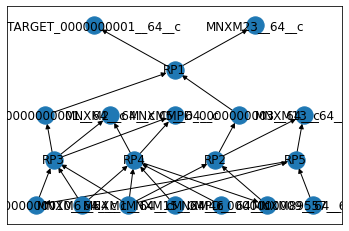

In [7]:
newG, pos = rpdraw._hierarchy_pos(rpgraph.G, target, plot_only_central=False, filter_cofactors=False)
nx.draw_networkx(newG, pos=pos)

DEBUG:rpDraw:BC_20662__64__MNXC3 is a list cofactor and is filtered
DEBUG:rpDraw:BC_26705__64__MNXC3 is a list cofactor and is filtered
DEBUG:rpDraw:	TARGET_0000000001__64__MNXC3 --> ['RP1']
DEBUG:rpDraw:	RP1 predecessors: ['CMPD_0000000003__64__MNXC3', 'MNXM4__64__MNXC3']
DEBUG:rpDraw:parent_layer: ['TARGET_0000000001__64__MNXC3']
DEBUG:rpDraw:==================================
DEBUG:rpDraw:toadd_nodes: ['CMPD_0000000003__64__MNXC3', 'BC_32401__64__MNXC3', 'RP1', 'BC_32877__64__MNXC3', 'MNXM10__64__MNXC3', 'MNXM4__64__MNXC3', 'MNXM188__64__MNXC3', 'RP2']
DEBUG:rpDraw:parent_layer: ['TARGET_0000000001__64__MNXC3']
DEBUG:rpDraw:	TARGET_0000000001__64__MNXC3 --> ['RP1']
DEBUG:rpDraw:	Adding node: RP1
DEBUG:rpDraw:	RP1 predecessors: ['CMPD_0000000003__64__MNXC3', 'MNXM4__64__MNXC3']
DEBUG:rpDraw:		CMPD_0000000003__64__MNXC3 type: species
DEBUG:rpDraw:		MNXM4__64__MNXC3 type: species
DEBUG:rpDraw:layer: ['RP1']
DEBUG:rpDraw:pos: {'TARGET_0000000001__64__MNXC3': (0.5, 0.0), 'RP1': (0.5, -0.

{'type': 'species', 'name': 'catechol', 'miriam': {'inchikey': ['YCIMNLLNPGFGHC-UHFFFAOYSA-N'], 'seed': ['cpd01232', 'cpd00077'], 'sabiork': ['5002'], 'metacyc': ['Catechols', 'CATECHOL'], 'hmdb': ['HMDB00957'], 'chebi': ['50524', '32402', '41441', '3467', '23054', '13950', '135158', '18135'], 'metanetx': ['MNXM96740', 'MNXM724816', 'MNXM723979', 'MNXM120336', 'MNXM120335', 'MNXM114245', 'MNXM181'], 'bigg': ['M_catechol', 'catechol']}, 'brsynth': {'dfG_prime_m': {'units': 'kj_per_mol', 'value': 27.661840303881917}, 'dfG_uncert': {'units': 'kj_per_mol', 'value': 7.529074869413348}, 'dfG_prime_o': {'units': 'kj_per_mol', 'value': 44.77667783860295}, 'smiles': '[H]Oc1c([H])c([H])c([H])c([H])c1O[H]', 'inchi': 'InChI=1S/C6H6O2/c7-5-3-1-2-4-6(5)8/h1-4,7-8H', 'inchikey': 'YCIMNLLNPGFGHC-UHFFFAOYSA-N'}, 'central_species': True, 'sink_species': False}
{'type': 'species', 'name': 'BC_32401', 'miriam': {'inchikey': ['BAWFJGJZGIEFAR-UHFFFAOYSA-O']}, 'brsynth': {'dfG_prime_m': {'units': 'kj_per_mol

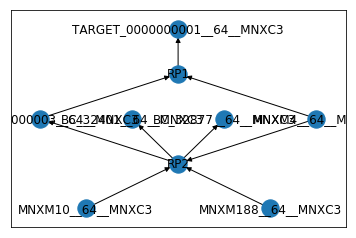

In [28]:
newG, pos = rpdraw._hierarchy_pos(rpgraph.G, target, plot_only_central=False, filter_cofactors=True)
nx.draw_networkx(newG, pos=pos)

In [29]:
pathway_layers = []
ordered_y = sorted(list(set([pos[i][1] for i in pos])))
for layer_y_loc in ordered_y:
    ordered_x = sorted(list(set([pos[i][0] for i in pos if pos[i][1]==layer_y_loc])))
    reaction = []
    for layer_x_loc in ordered_x:
        for node_id in pos:
            if pos[node_id][1]==layer_y_loc and pos[node_id][0]==layer_x_loc:
                n = newG.nodes.get(node_id)
                reaction.append(node_id)
                break
    pathway_layers.append(reaction)

In [30]:
pathway_layers

[['MNXM10__64__MNXC3', 'MNXM188__64__MNXC3'],
 ['RP2'],
 ['CMPD_0000000003__64__MNXC3',
  'BC_32401__64__MNXC3',
  'BC_32877__64__MNXC3',
  'MNXM4__64__MNXC3'],
 ['RP1'],
 ['TARGET_0000000001__64__MNXC3']]

In [31]:
a = []
for i in list(newG.nodes):
    if newG.node.get(i)['type']=='species':
        a.append(newG.node.get(i)['brsynth']['inchi'])

dict_keys(['dfG_prime_m', 'dfG_uncert', 'dfG_prime_o', 'smiles', 'inchi', 'inchikey'])
dict_keys(['dfG_prime_m', 'dfG_uncert', 'dfG_prime_o', 'smiles', 'inchi', 'inchikey'])
dict_keys(['dfG_prime_m', 'dfG_uncert', 'dfG_prime_o', 'smiles', 'inchi', 'inchikey'])
dict_keys(['dfG_prime_m', 'dfG_uncert', 'dfG_prime_o', 'smiles', 'inchi', 'inchikey'])
dict_keys(['dfG_prime_m', 'dfG_uncert', 'dfG_prime_o', 'smiles', 'inchi', 'inchikey'])
dict_keys(['dfG_prime_m', 'dfG_uncert', 'dfG_prime_o', 'smiles', 'inchi', 'inchikey'])
dict_keys(['dfG_prime_m', 'dfG_uncert', 'dfG_prime_o', 'smiles', 'inchi', 'inchikey'])


In [32]:
a

['InChI=1S/C6H6O4/c7-5(8)3-1-2-4-6(9)10/h1-4H,(H,7,8)(H,9,10)',
 'InChI=1S/C6H6O2/c7-5-3-1-2-4-6(5)8/h1-4,7-8H',
 'InChI=1S/O2/c1-2',
 'InChI=1S/C21H27N7O14P2/c22-17-12-19(25-7-24-17)28(8-26-12)21-16(32)14(30)11(41-21)6-39-44(36,37)42-43(34,35)38-5-10-13(29)15(31)20(40-10)27-3-1-2-9(4-27)18(23)33/h1-4,7-8,10-11,13-16,20-21,29-32H,5-6H2,(H5-,22,23,24,25,33,34,35,36,37)/p+1',
 'InChI=1S/H3N/h1H3',
 'InChI=1S/C21H29N7O14P2/c22-17-12-19(25-7-24-17)28(8-26-12)21-16(32)14(30)11(41-21)6-39-44(36,37)42-43(34,35)38-5-10-13(29)15(31)20(40-10)27-3-1-2-9(4-27)18(23)33/h1,3-4,7-8,10-11,13-16,20-21,29-32H,2,5-6H2,(H2,23,33)(H,34,35)(H,36,37)(H2,22,24,25)/p-2/t10-,11-,13-,14-,15-,16-,20-,21-/m1/s1',
 'InChI=1S/C7H7NO2/c8-6-4-2-1-3-5(6)7(9)10/h1-4H,8H2,(H,9,10)/p-1']

In [42]:
import drawSvg as draw
from rdkit.Chem import MolFromInchi
from rdkit.Chem import Draw
import copy
import re
import svgutils.transform as sg

In [60]:
def drawChemicalList(id_inchi, subplot_size=[200, 200]):
    toRet = {}
    inchi_list = list(set([id_inchi[i] for i in id_inchi]))
    list_mol = [MolFromInchi(inchi) for inchi in inchi_list]
    for i in range(len(list_mol)):
        cp_list_mol = copy.deepcopy(list_mol)
        cp_list_mol.pop(i)
        tmp_list_mol = [list_mol[i]]+cp_list_mol
        img = Draw.MolsToGridImage(tmp_list_mol, molsPerRow=1, subImgSize=(subplot_size[0], subplot_size[1]), useSVG=True)
        #add the groups tag with the id's of the reactions -- should have be size width=subplot_size[0] height=subplot_size[1]*len(list_mol)
        bond_0_count = 0
        svg_str = ''
        for line in img.splitlines():
            add_line = True
            m0 = re.findall("(\d+\.\d+)", line)
            if m0:
                for y in m0:
                    if float(y)>subplot_size[1]:
                        add_line = False
            m1 = re.findall("height=\'\d+", line)
            if m1:
                line = re.sub(r"height=\'\d+", "height=\'"+str(subplot_size[1]), line)
                #line.replace(str(subplot_size[i]*len(list_mol)), str(subplot_size[1]))
            if add_line:
                svg_str += line+'\n'
        for y in id_inchi:
            if id_inchi[y]==inchi_list[i]:
                toRet[y] = svg_str
    return toRet

In [35]:
inchi_svg = drawChemicalList(a)

In [40]:
inchi_svg.keys()

dict_keys(['InChI=1S/C21H27N7O14P2/c22-17-12-19(25-7-24-17)28(8-26-12)21-16(32)14(30)11(41-21)6-39-44(36,37)42-43(34,35)38-5-10-13(29)15(31)20(40-10)27-3-1-2-9(4-27)18(23)33/h1-4,7-8,10-11,13-16,20-21,29-32H,5-6H2,(H5-,22,23,24,25,33,34,35,36,37)/p+1', 'InChI=1S/C7H7NO2/c8-6-4-2-1-3-5(6)7(9)10/h1-4H,8H2,(H,9,10)/p-1', 'InChI=1S/C21H29N7O14P2/c22-17-12-19(25-7-24-17)28(8-26-12)21-16(32)14(30)11(41-21)6-39-44(36,37)42-43(34,35)38-5-10-13(29)15(31)20(40-10)27-3-1-2-9(4-27)18(23)33/h1,3-4,7-8,10-11,13-16,20-21,29-32H,2,5-6H2,(H2,23,33)(H,34,35)(H,36,37)(H2,22,24,25)/p-2/t10-,11-,13-,14-,15-,16-,20-,21-/m1/s1', 'InChI=1S/H3N/h1H3', 'InChI=1S/O2/c1-2', 'InChI=1S/C6H6O4/c7-5(8)3-1-2-4-6(9)10/h1-4H,(H,7,8)(H,9,10)', 'InChI=1S/C6H6O2/c7-5-3-1-2-4-6(5)8/h1-4,7-8H'])

In [37]:
pos

{'TARGET_0000000001__64__MNXC3': (0.5, 0.0),
 'RP1': (0.5, -0.2),
 'CMPD_0000000003__64__MNXC3': (0.125, -0.4),
 'BC_32401__64__MNXC3': (0.375, -0.4),
 'BC_32877__64__MNXC3': (0.625, -0.4),
 'MNXM4__64__MNXC3': (0.875, -0.4),
 'RP2': (0.5, -0.6000000000000001),
 'MNXM10__64__MNXC3': (0.25, -0.8),
 'MNXM188__64__MNXC3': (0.75, -0.8)}

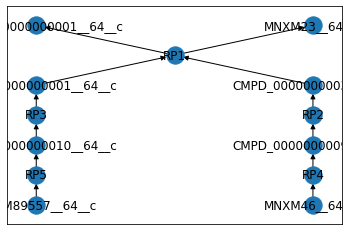

In [28]:
nx.draw_networkx(newG, pos=pos)

In [52]:
x_len = 1000
y_len = 1000
fig = sg.SVGFigure(str(x_len), str(y_len))
f = sg.fromstring(inchi_svg['InChI=1S/C21H27N7O14P2/c22-17-12-19(25-7-24-17)28(8-26-12)21-16(32)14(30)11(41-21)6-39-44(36,37)42-43(34,35)38-5-10-13(29)15(31)20(40-10)27-3-1-2-9(4-27)18(23)33/h1-4,7-8,10-11,13-16,20-21,29-32H,5-6H2,(H5-,22,23,24,25,33,34,35,36,37)/p+1'])
p = f.getroot()
p.moveto(0, 0)
fig.append(p)
f = sg.fromstring(inchi_svg['InChI=1S/C21H29N7O14P2/c22-17-12-19(25-7-24-17)28(8-26-12)21-16(32)14(30)11(41-21)6-39-44(36,37)42-43(34,35)38-5-10-13(29)15(31)20(40-10)27-3-1-2-9(4-27)18(23)33/h1,3-4,7-8,10-11,13-16,20-21,29-32H,2,5-6H2,(H2,23,33)(H,34,35)(H,36,37)(H2,22,24,25)/p-2/t10-,11-,13-,14-,15-,16-,20-,21-/m1/s1'])
p = f.getroot()
p.moveto(0, 200)
fig.append(p)

In [53]:
svg = fig.to_str().decode("utf-8")

In [54]:
open('test.svg', 'w').write(svg)

53927

In [130]:
def graph_svg(G, target, subplot_size=[200,200], reaction_size=[200,200], plot_only_central=False, filter_cofactors=True):
    #gather all the inchis and convert to svg
    resG, pos = rpdraw._hierarchy_pos(G, 
                                      target, 
                                      plot_only_central=plot_only_central, 
                                      filter_cofactors=filter_cofactors)
    id_inchi = {}
    for node in list(resG.nodes):
        if newG.node.get(node)['type']=='species':
            id_inchi[node] = newG.node.get(node)['brsynth']['inchi']
    id_svg = drawChemicalList(id_inchi, subplot_size)
    #first stack the 
    print(id_inchi.keys())
    print('============================')
    print(id_svg.keys())
    print('============================')
    pathway_layers = []
    ordered_y = sorted(list(set([pos[i][1] for i in pos])))
    for layer_y_loc in ordered_y:
        ordered_x = sorted(list(set([pos[i][0] for i in pos if pos[i][1]==layer_y_loc])))
        reaction = []
        for layer_x_loc in ordered_x:
            for node_id in pos:
                if pos[node_id][1]==layer_y_loc and pos[node_id][0]==layer_x_loc:
                    n = resG.nodes.get(node_id)
                    reaction.append(node_id)
                    break
        pathway_layers.append(reaction)
    print(pathway_layers)
    print('============================')
    x_len = subplot_size[0]*len(pathway_layers)
    len_max_y = max([len(i) for i in pathway_layers])
    y_len = subplot_size[1]*len_max_y
    fig = sg.SVGFigure(str(x_len), str(y_len))
    x_move = 0
    print('len_max_y: '+str(len_max_y))
    print('x_len: '+str(x_len))
    print('y_len: '+str(y_len))
    nodes_attach_locs = {}
    for layer in pathway_layers:
        y_move = 0
        y_shift = (y_len-subplot_size[1]*len(layer))/2
        print('\ty_shift: '+str(y_shift))
        for cid in layer:
            node = G.node.get(cid)
            if node['type']=='species':
                print('\t'+str(cid))
                print('\t--> '+str((y_len/len(layer))))
                print('\tx: '+str(x_move))
                print('\ty: '+str(y_move+y_shift))
                print('\t-------------------------------')
                f = sg.fromstring(id_svg[cid])
                p = f.getroot()
                p.moveto(x_move, y_move+y_shift)
                fig.append(p)
                nodes_attach_locs[cid] = {'left': (x_move, (y_move+y_shift)/2), 
                                          'right': (x_move+subplot_size[0], (y_move+y_shift)/2)}
            if node['type']=='reaction':
                #draw the reaction rectangle
                d = draw.Drawing(subplot_size[0], subplot_size[1], origin=(0,0))
                #add white backgroung TODO perhaps add blurry
                d.append(draw.Rectangle(0, 0, reaction_size[0], reaction_size[1], fill='#FFFFFF'))
                d.append(draw.Rectangle(subplot_size[0]/2-reaction_size[0]*len_max_y/2,
                                        subplot_size[1]/2-reaction_size[1]/2,
                                        reaction_size[0],
                                        reaction_size[1],
                                        fill=fill_color,
                                        stroke_width=stroke_width,
                                        stroke=stroke_color))
            y_move += subplot_size[1]
            #layer_num += 1
        x_move += subplot_size[0]
    svg = fig.to_str().decode("utf-8")
    open('test.svg', 'w').write(svg)

In [131]:
graph_svg(newG, [i for i in newG.nodes if 'TARGET' in i][0])

DEBUG:rpDraw:	TARGET_0000000001__64__MNXC3 --> ['RP1']
DEBUG:rpDraw:	RP1 predecessors: ['CMPD_0000000003__64__MNXC3', 'MNXM4__64__MNXC3']
DEBUG:rpDraw:parent_layer: ['TARGET_0000000001__64__MNXC3']
DEBUG:rpDraw:==================================
DEBUG:rpDraw:toadd_nodes: ['CMPD_0000000003__64__MNXC3', 'BC_32401__64__MNXC3', 'RP1', 'BC_32877__64__MNXC3', 'MNXM10__64__MNXC3', 'MNXM4__64__MNXC3', 'MNXM188__64__MNXC3', 'RP2']
DEBUG:rpDraw:parent_layer: ['TARGET_0000000001__64__MNXC3']
DEBUG:rpDraw:	TARGET_0000000001__64__MNXC3 --> ['RP1']
DEBUG:rpDraw:	Adding node: RP1
DEBUG:rpDraw:	RP1 predecessors: ['CMPD_0000000003__64__MNXC3', 'MNXM4__64__MNXC3']
DEBUG:rpDraw:		CMPD_0000000003__64__MNXC3 type: species
DEBUG:rpDraw:		MNXM4__64__MNXC3 type: species
DEBUG:rpDraw:layer: ['RP1']
DEBUG:rpDraw:pos: {'TARGET_0000000001__64__MNXC3': (0.5, 0.0), 'RP1': (0.5, -0.2)}
DEBUG:rpDraw:==================================
DEBUG:rpDraw:toadd_nodes: ['CMPD_0000000003__64__MNXC3', 'BC_32401__64__MNXC3', 'BC_

{'type': 'species', 'name': 'catechol', 'miriam': {'inchikey': ['YCIMNLLNPGFGHC-UHFFFAOYSA-N'], 'seed': ['cpd01232', 'cpd00077'], 'sabiork': ['5002'], 'metacyc': ['Catechols', 'CATECHOL'], 'hmdb': ['HMDB00957'], 'chebi': ['50524', '32402', '41441', '3467', '23054', '13950', '135158', '18135'], 'metanetx': ['MNXM96740', 'MNXM724816', 'MNXM723979', 'MNXM120336', 'MNXM120335', 'MNXM114245', 'MNXM181'], 'bigg': ['M_catechol', 'catechol']}, 'brsynth': {'dfG_prime_m': {'units': 'kj_per_mol', 'value': 27.661840303881917}, 'dfG_uncert': {'units': 'kj_per_mol', 'value': 7.529074869413348}, 'dfG_prime_o': {'units': 'kj_per_mol', 'value': 44.77667783860295}, 'smiles': '[H]Oc1c([H])c([H])c([H])c([H])c1O[H]', 'inchi': 'InChI=1S/C6H6O2/c7-5-3-1-2-4-6(5)8/h1-4,7-8H', 'inchikey': 'YCIMNLLNPGFGHC-UHFFFAOYSA-N'}, 'central_species': True, 'sink_species': False}
{'type': 'species', 'name': 'BC_32401', 'miriam': {'inchikey': ['BAWFJGJZGIEFAR-UHFFFAOYSA-O']}, 'brsynth': {'dfG_prime_m': {'units': 'kj_per_mol

In [69]:
a = [['MNXM10__64__MNXC3', 'MNXM188__64__MNXC3'], ['RP2'], ['CMPD_0000000003__64__MNXC3', 'BC_32401__64__MNXC3', 'BC_32877__64__MNXC3', 'MNXM4__64__MNXC3'], ['RP1'], ['TARGET_0000000001__64__MNXC3']]

In [70]:
len(a)

5

In [72]:
max([len(i) for i in a])

4

In [91]:
x_len = 200
y_len = 400
fig = sg.SVGFigure(str(x_len), str(y_len))
f = sg.fromstring(inchi_svg['InChI=1S/C21H27N7O14P2/c22-17-12-19(25-7-24-17)28(8-26-12)21-16(32)14(30)11(41-21)6-39-44(36,37)42-43(34,35)38-5-10-13(29)15(31)20(40-10)27-3-1-2-9(4-27)18(23)33/h1-4,7-8,10-11,13-16,20-21,29-32H,5-6H2,(H5-,22,23,24,25,33,34,35,36,37)/p+1'])
p = f.getroot()
p.moveto(0, 0)
fig.append(p)
f = sg.fromstring(inchi_svg['InChI=1S/C21H29N7O14P2/c22-17-12-19(25-7-24-17)28(8-26-12)21-16(32)14(30)11(41-21)6-39-44(36,37)42-43(34,35)38-5-10-13(29)15(31)20(40-10)27-3-1-2-9(4-27)18(23)33/h1,3-4,7-8,10-11,13-16,20-21,29-32H,2,5-6H2,(H2,23,33)(H,34,35)(H,36,37)(H2,22,24,25)/p-2/t10-,11-,13-,14-,15-,16-,20-,21-/m1/s1'])
p = f.getroot()
p.moveto(0, 100)
fig.append(p)
svg = fig.to_str().decode("utf-8")
open('test.svg', 'w').write(svg)

53923

In [85]:
arrowhead = draw.Marker(-0.1, -0.5, 0.9, 0.5, scale=4, orient='auto', id='normal_arrow')
arrowhead.append(draw.Lines(-0.1, -0.5, -0.1, 0.5, 0.9, 0, fill='black', close=True))
arrowhead_flat = draw.Marker(-0.1, -0.5, 0.9, 0.5, scale=4, orient=0, id='flat_arrow')
arrowhead_flat.append(draw.Lines(-0.1, -0.5, -0.1, 0.5, 0.9, 0, fill='black', close=True))
rev_arrowhead = draw.Marker(-0.1, -0.5, 0.9, 0.5, scale=4, orient=0, id='rev_flat_arrow')
rev_arrowhead.append(draw.Lines(-0.1, -0.5, -0.1, 0.5, 0.9, 0, fill='black', close=True))
arrowhead_comp_x = 7.0
arrowhead_comp_y = 7.0

In [4]:
def drawChemicalList(id_inchi, subplot_size=[200, 200]):
    toRet = {}
    inchi_list = list(set([id_inchi[i] for i in id_inchi]))
    list_mol = [MolFromInchi(inchi) for inchi in inchi_list]
    for i in range(len(list_mol)):
        cp_list_mol = copy.deepcopy(list_mol)
        cp_list_mol.pop(i)
        tmp_list_mol = [list_mol[i]]+cp_list_mol
        img = Draw.MolsToGridImage(tmp_list_mol, molsPerRow=1, subImgSize=(subplot_size[0], subplot_size[1]), useSVG=True)
        #add the groups tag with the id's of the reactions -- should have be size width=subplot_size[0] height=subplot_size[1]*len(list_mol)
        bond_0_count = 0
        svg_str = ''
        for line in img.splitlines():
            add_line = True
            m0 = re.findall("(\d+\.\d+)", line)
            if m0:
                for y in m0:
                    if float(y)>subplot_size[1]:
                        add_line = False
            m1 = re.findall("height=\'\d+", line)
            if m1:
                line = re.sub(r"height=\'\d+", "height=\'"+str(subplot_size[1]), line)
                #line.replace(str(subplot_size[i]*len(list_mol)), str(subplot_size[1]))
            if add_line:
                svg_str += line+'\n'
        for y in id_inchi:
            if id_inchi[y]==inchi_list[i]:
                toRet[y] = svg_str
    return toRet

In [115]:
##
# Base the drawing on the size of subplot_size
#
def graph_svg(G,
              target,
              subplot_size=[200,200],
              reac_size=[20,60],
              reac_fill_color='#ddd',
              reac_stroke_color='black',
              reac_stroke_width=2,
              arrow_gap_size=100,
              arrow_stroke_color='black',
              arrow_stroke_width=2,
              plot_only_central=True,
              filter_cofactors=True):
    #gather all the inchis and convert to svg
    resG, pos = rpdraw._hierarchy_pos(G, 
                                      target, 
                                      plot_only_central=plot_only_central, 
                                      filter_cofactors=filter_cofactors)
    id_inchi = {}
    for node in list(resG.nodes):
        if resG.node.get(node)['type']=='species':
            id_inchi[node] = resG.node.get(node)['brsynth']['inchi']
    id_svg = drawChemicalList(id_inchi, subplot_size)
    print(id_svg)
    #first stack the 
    print('============================')
    pathway_layers = []
    ordered_y = sorted(list(set([pos[i][1] for i in pos])))
    for layer_y_loc in ordered_y:
        ordered_x = sorted(list(set([pos[i][0] for i in pos if pos[i][1]==layer_y_loc])))
        reaction = []
        for layer_x_loc in ordered_x:
            for node_id in pos:
                if pos[node_id][1]==layer_y_loc and pos[node_id][0]==layer_x_loc:
                    n = resG.nodes.get(node_id)
                    reaction.append(node_id)
                    break
        pathway_layers.append(reaction)
    print('pathway_layers: '+str(pathway_layers))
    print('============================')
    x_len = subplot_size[0]*len(pathway_layers)
    len_max_y = max([len(i) for i in pathway_layers])
    y_len = subplot_size[1]*len_max_y
    #make the fig white
    fig = sg.SVGFigure(str(x_len), str(y_len))
    #add a white background to the full image
    """
    d = draw.Drawing(x_len, y_len, origin=(0,0))
    d.append(draw.Rectangle(0, 0, x_len, y_len, fill='#FFFFFF'))
    white_back = sg.fromstring(d.asSvg())
    w_b = white_back.getroot()
    w_b.moveto(0, y_len) #not sure why I have to move this
    fig.append(w_b)
    """
    #######################
    x_move = 0
    print('############ Chem/Reac ###############')
    print('len_max_y: '+str(len_max_y))
    print('x_len: '+str(x_len))
    print('y_len: '+str(y_len))
    nodes_attach_locs = {}
    for layer in pathway_layers:
        y_move = 0
        y_shift = (y_len-subplot_size[1]*len(layer))/2
        print('====== y_shift: '+str(y_shift)+' =====')
        for cid in layer:
            node = G.node.get(cid)
            if node['type']=='species':
                print('\tSpecies: '+str(cid))
                print('\tx: '+str(x_move))
                print('\ty: '+str(y_move+y_shift))
                print('\t-------------------------------')
                f = sg.fromstring(id_svg[cid])
                p = f.getroot()
                p.moveto(x_move, y_move+y_shift)
                fig.append(p)
                nodes_attach_locs[cid] = {'left': (x_move, (y_move+y_shift)/2), 
                                          'right': (x_move+subplot_size[0], (y_move+y_shift)/2)}
            if node['type']=='reaction':
                #draw the reaction rectangle
                print('\tReaction: '+str(cid))
                d = draw.Drawing(subplot_size[0], subplot_size[1], origin=(0,0))
                #add white backgroung TODO perhaps add blurry
                print('\tx: '+str(subplot_size[0]/2-reac_size[0]*len_max_y/2))
                print('\ty: '+str(subplot_size[1]/2-reac_size[1]/2))
                d.append(draw.Rectangle(0, 0, subplot_size[0], subplot_size[1], fill='#FFFFFF'))
                edge_x = subplot_size[0]/2-reac_size[1]/2                
                edge_y = subplot_size[1]/2-reac_size[0]/2
                print('\tedge_x: '+str(subplot_size[0]/2-reac_size[1]/2))
                print('\tedge_y: '+str(subplot_size[1]/2-reac_size[0]/2))
                print('\t-------------------------------')
                d.append(draw.Rectangle(edge_x,
                                        edge_y,
                                        reac_size[1],
                                        reac_size[0],
                                        fill=reac_fill_color,
                                        stroke_width=reac_stroke_width,
                                        stroke=reac_stroke_color))
                a = sg.fromstring(d.asSvg())
                a_r = a.getroot()
                a_r.moveto(x_move, y_move+y_shift+subplot_size[1]) #WARNING: not sure why I have to + subpot
                fig.append(a_r)
                nodes_attach_locs[cid] = {'left': (x_move+edge_x, 
                                                   y_move+y_shift+subplot_size[1]), 
                                          'right': (x_move+edge_x+reac_size[1], 
                                                    y_move+y_shift+subplot_size[1]+edge_y-reac_size[0]/2)}
            y_move += subplot_size[1]
            #layer_num += 1
        x_move += subplot_size[0]
    print('nodes_attach_locs: '+str(nodes_attach_locs))
    ######## draw the lines #############
    print('############ Arrows ###############')
    for edge in list(resG.edges):
        print('\t---------- edge: '+str(edge)+' -----------')
        source_x = nodes_attach_locs[edge[0]]['right'][0]
        print('\tsource_x: '+str(source_x))
        source_y = nodes_attach_locs[edge[0]]['right'][1]
        print('\tsource_y: '+str(source_y))
        target_x = nodes_attach_locs[edge[1]]['left'][0]
        print('\ttarget_x: '+str(target_x))
        target_y = nodes_attach_locs[edge[1]]['left'][1]
        print('\ttarget_y: '+str(target_y))
        x_len = max([source_x, target_x])-min([source_x, target_x])
        print('\tx_len: '+str(x_len))
        y_len = max([source_y, target_y])-min([source_y, target_y])
        print('\ty_len: '+str(y_len))
        d = draw.Drawing(x_len, y_len, origin=(0,0))
        p = draw.Path(stroke=arrow_stroke_color,
                      stroke_width=arrow_stroke_width,
                      fill='transparent',
                      marker_end=arrowhead_flat)
        p.M(source_x, source_y).C(arrow_gap_size-source_x,
                                                 source_y,
                                                 source_x,
                                                 source_y,
                                                 target_x,
                                                 target_y)
        d.append(p)
    svg = fig.to_str().decode("utf-8")
    open('test.svg', 'w').write(svg)

In [116]:
graph_svg(rpgraph.G, [i for i in rpgraph.G.nodes if 'TARGET' in i][0])

DEBUG:rpDraw:MNXM3__64__MNXC3 is not a central species and is filtered
DEBUG:rpDraw:MNXM11__64__MNXC3 is not a central species and is filtered
DEBUG:rpDraw:MNXM5__64__MNXC3 is not a central species and is filtered
DEBUG:rpDraw:MNXM14__64__MNXC3 is not a central species and is filtered
DEBUG:rpDraw:MNXM2__64__MNXC3 is not a central species and is filtered
DEBUG:rpDraw:	TARGET_0000000001__64__MNXC3 --> ['RP1']
DEBUG:rpDraw:	RP1 predecessors: ['CMPD_0000000004__64__MNXC3', 'MNXM4__64__MNXC3', 'MNXM6__64__MNXC3', 'MNXM1__64__MNXC3']
DEBUG:rpDraw:parent_layer: ['TARGET_0000000001__64__MNXC3']
DEBUG:rpDraw:==================================
DEBUG:rpDraw:toadd_nodes: ['RP3', 'RP4', 'RP6', 'CMPD_0000000004__64__MNXC3', 'MNXM12__64__MNXC3', 'CMPD_0000000008__64__MNXC3', 'CMPD_0000000018__64__MNXC3', 'CMPD_0000000019__64__MNXC3', 'RP2', 'RP1', 'MNXM153__64__MNXC3', 'MNXM4__64__MNXC3', 'RP5', 'MNXM6__64__MNXC3', 'MNXM1__64__MNXC3', 'MNXM438__64__MNXC3', 'CMPD_0000000024__64__MNXC3']
DEBUG:rpDraw:

DEBUG:rpDraw:	Adding node: RP3
DEBUG:rpDraw:	RP3 predecessors: ['CMPD_0000000018__64__MNXC3', 'CMPD_0000000019__64__MNXC3']
DEBUG:rpDraw:		CMPD_0000000018__64__MNXC3 type: species
DEBUG:rpDraw:		CMPD_0000000019__64__MNXC3 type: species
DEBUG:rpDraw:	MNXM12__64__MNXC3 --> ['RP3', 'RP6']
DEBUG:rpDraw:	Adding node: RP6
DEBUG:rpDraw:	RP6 predecessors: ['MNXM12__64__MNXC3', 'MNXM438__64__MNXC3', 'MNXM3__64__MNXC3']
DEBUG:rpDraw:		MNXM12__64__MNXC3 type: species
DEBUG:rpDraw:		MNXM438__64__MNXC3 type: species
DEBUG:rpDraw:		MNXM3__64__MNXC3 type: species
DEBUG:rpDraw:	CMPD_0000000024__64__MNXC3 --> ['RP6', 'RP4']
DEBUG:rpDraw:	CMPD_0000000018__64__MNXC3 --> ['RP4', 'RP3']
DEBUG:rpDraw:	MNXM153__64__MNXC3 --> ['RP5']
DEBUG:rpDraw:	CMPD_0000000019__64__MNXC3 --> ['RP5', 'RP3']
DEBUG:rpDraw:layer: ['RP3', 'RP6']
DEBUG:rpDraw:pos: {'TARGET_0000000001__64__MNXC3': (0.5, 0.0), 'RP1': (0.5, -0.2), 'CMPD_0000000004__64__MNXC3': (0.125, -0.4), 'MNXM4__64__MNXC3': (0.375, -0.4), 'MNXM6__64__MNXC3': (0

{'CMPD_0000000004__64__MNXC3': "<?xml version='1.0' encoding='iso-8859-1'?>\n<svg version='1.1' baseProfile='full'\n              xmlns:svg='http://www.w3.org/2000/svg'\n                      xmlns:rdkit='http://www.rdkit.org/xml'\n                      xmlns:xlink='http://www.w3.org/1999/xlink'\n                  xml:space='preserve'\nwidth='200px' height='200px' >\n<rect style='opacity:1.0;fill:#FFFFFF;stroke:none' width='200' height='200' x='0' y='0'> </rect>\n<path d='M 95.979,97.4448 96.3968,90.0176' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path d='M 97.5271,96.4142 97.8196,91.2152' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path d='M 95.979,97.4448 102.202,101.52' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />\n<path d='M

In [77]:
a = {'MNXM438__64__MNXC3': {'left': (0, 250.0), 'right': (200, 250.0)}, 'RP3': {'left': (270.0, 600.0), 'right': (330.0, 680.0)}, 'RP6': {'left': (270.0, 800.0), 'right': (330.0, 880.0)}, 'CMPD_0000000008__64__MNXC3': {'left': (400, 0.0), 'right': (600, 0.0)}, 'MNXM12__64__MNXC3': {'left': (400, 100.0), 'right': (600, 100.0)}, 'CMPD_0000000024__64__MNXC3': {'left': (400, 200.0), 'right': (600, 200.0)}, 'CMPD_0000000018__64__MNXC3': {'left': (400, 300.0), 'right': (600, 300.0)}, 'MNXM153__64__MNXC3': {'left': (400, 400.0), 'right': (600, 400.0)}, 'CMPD_0000000019__64__MNXC3': {'left': (400, 500.0), 'right': (600, 500.0)}, 'RP2': {'left': (670.0, 500.0), 'right': (730.0, 580.0)}, 'RP4': {'left': (670.0, 700.0), 'right': (730.0, 780.0)}, 'RP5': {'left': (670.0, 900.0), 'right': (730.0, 980.0)}, 'CMPD_0000000004__64__MNXC3': {'left': (800, 100.0), 'right': (1000, 100.0)}, 'MNXM4__64__MNXC3': {'left': (800, 200.0), 'right': (1000, 200.0)}, 'MNXM6__64__MNXC3': {'left': (800, 300.0), 'right': (1000, 300.0)}, 'MNXM1__64__MNXC3': {'left': (800, 400.0), 'right': (1000, 400.0)}, 'RP1': {'left': (1070.0, 700.0), 'right': (1130.0, 780.0)}, 'TARGET_0000000001__64__MNXC3': {'left': (1200, 250.0), 'right': (1400, 250.0)}}

In [79]:
a['MNXM438__64__MNXC3']

{'left': (0, 250.0), 'right': (200, 250.0)}

In [84]:
for i in list(rpgraph.G.edges):
    print(i)

('CMPD_0000000004__64__MNXC3', 'RP1')
('MNXM4__64__MNXC3', 'RP1')
('MNXM4__64__MNXC3', 'RP2')
('MNXM4__64__MNXC3', 'RP4')
('MNXM6__64__MNXC3', 'RP1')
('MNXM6__64__MNXC3', 'RP2')
('MNXM6__64__MNXC3', 'RP4')
('MNXM6__64__MNXC3', 'RP5')
('MNXM1__64__MNXC3', 'RP1')
('MNXM1__64__MNXC3', 'RP2')
('MNXM1__64__MNXC3', 'RP4')
('MNXM1__64__MNXC3', 'RP5')
('CMPD_0000000008__64__MNXC3', 'RP2')
('MNXM12__64__MNXC3', 'RP6')
('CMPD_0000000018__64__MNXC3', 'RP3')
('CMPD_0000000019__64__MNXC3', 'RP3')
('CMPD_0000000024__64__MNXC3', 'RP4')
('MNXM153__64__MNXC3', 'RP5')
('MNXM438__64__MNXC3', 'RP6')
('MNXM3__64__MNXC3', 'RP6')
('RP1', 'TARGET_0000000001__64__MNXC3')
('RP1', 'MNXM5__64__MNXC3')
('RP1', 'MNXM2__64__MNXC3')
('RP2', 'CMPD_0000000004__64__MNXC3')
('RP2', 'MNXM5__64__MNXC3')
('RP2', 'MNXM2__64__MNXC3')
('RP3', 'CMPD_0000000008__64__MNXC3')
('RP3', 'MNXM12__64__MNXC3')
('RP4', 'CMPD_0000000018__64__MNXC3')
('RP4', 'MNXM5__64__MNXC3')
('RP4', 'MNXM2__64__MNXC3')
('RP5', 'CMPD_0000000019__64__MNXC

In [82]:
x_len = 100
y_len = 100
fig = sg.SVGFigure(str(x_len), str(y_len))
d = draw.Drawing(x_len, y_len, origin=(0,0))
print(x_len)
print(y_len)
d.append(draw.Rectangle(0, 0, x_len, y_len, fill='#FFFFFF'))
a = sg.fromstring(d.asSvg())
a_r = a.getroot()
a_r.moveto(0, y_len)
fig.append(a_r)
svg = fig.to_str().decode("utf-8")
open('white.svg', 'w').write(svg)

100
100


336

In [30]:
print(svg)

<?xml version='1.0' encoding='ASCII' standalone='yes'?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" version="1.1" width="100" viewBox="0 0 100 100" height="100">
  <g transform="translate(0, 100) scale(1) "><defs>
</defs>
<rect x="0" y="-100" width="100" height="100" fill="#FFFFFF"/>
</g>
</svg>

